In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
import datetime as dt

In [2]:
stock='GOOG SPY'.split()
start=dt.date.today()-dt.timedelta(500)
data=pdr.get_data_yahoo(stock,start)['Close']
data.head()

Symbols,GOOG,SPY
Date,,
2021-03-08,101.208504,381.720001
2021-03-09,102.635002,387.170013
2021-03-10,102.751503,389.579987
2021-03-11,105.738503,393.529999
2021-03-12,103.096001,394.059998


In [3]:
returns=(np.log(data).diff()).dropna()
returns

Symbols,GOOG,SPY
Date,,
2021-03-09,0.013996,0.014177
2021-03-10,0.001134,0.006205
2021-03-11,0.028656,0.010088
2021-03-12,-0.025308,0.001346
2021-03-15,0.002214,0.005946
...,...,...
2022-07-14,-0.006681,-0.002431
2022-07-15,0.011837,0.018925
2022-07-18,-0.025662,-0.008291


In [4]:
returns.corr()

Symbols,GOOG,SPY
Symbols,,
GOOG,1.000000,0.804796
SPY,0.804796,1.000000


In [5]:
sample=returns.sample(60).corr()
sample

Symbols,GOOG,SPY
Symbols,,
GOOG,1.000000,0.862975
SPY,0.862975,1.000000


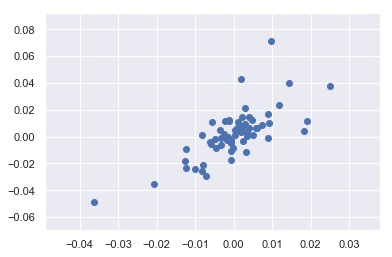

In [6]:
sample=returns.sample(60)
plt.scatter(x=sample['SPY'],y=sample['GOOG'])
plt.show()

In [7]:
reg=np.polyfit(sample['SPY'],sample['GOOG'],deg=1)#deg is degree of polynomial, our model is simple linear so deg =1
reg

array([1.49121919, 0.00211238])

In [8]:
reg.round(100)

array([1.49121919, 0.00211238])

In [9]:
reg[0],reg[1].round(4)

(1.4912191905070955, 0.0021)

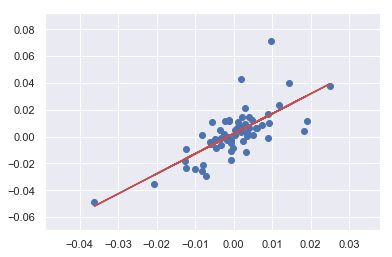

In [10]:
trend=np.polyval(reg,sample['SPY'])
plt.scatter(sample['SPY'],sample['GOOG'])
plt.plot(np.array(sample['SPY']),trend,'r')
plt.show()

In [11]:
data=pd.DataFrame(pdr.get_data_yahoo('AAPL',start)['Close'])
time=np.arange(1,len(data)+1)
data['time']=time
data=data[['time','Close']]
data=round(data,2)
data1=data[:-10]

In [12]:
test=data[-10:]

In [13]:
reg=np.polyfit(data1['time'][-30:],data1['Close'][-30:],deg=1)
reg

array([ -0.3074861 , 239.70444642])

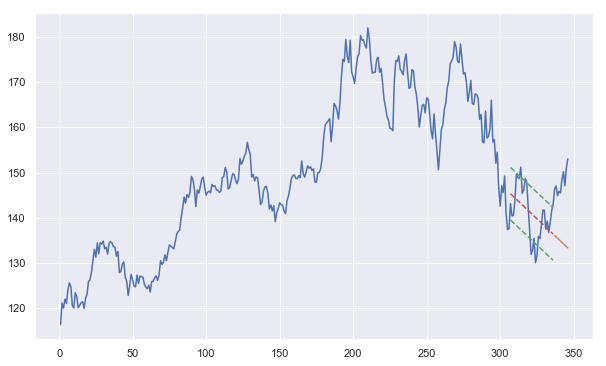

In [14]:
trend=np.polyval(reg,data1['time'][-30:])
trend1=np.polyval(reg,test['time'])
std=data1['Close'][-30:].std()
plt.figure(figsize=(10,6))
plt.plot(np.array(data['time']),np.array(data['Close']),label='S&P500')
plt.plot(np.array(data1['time'][-30:]),trend,'r--')
plt.plot(np.array(data1['time'][-30:]),trend+std,'g--')
plt.plot(np.array(data1['time'][-30:]),trend-std,'g--')
plt.plot(np.array(test['time']),trend1)
#plt.plot(np.array(test['time']),trend1+std,'g--')


In [15]:
predict=np.poly1d(reg)
predict(254)

161.60297812384113

[]

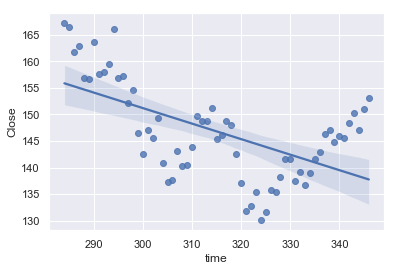

In [16]:
sn.regplot(x='time',y='Close',fit_reg=True,data=data[-63:])
plt.plot()